# Showcasing the usage of PCA in Image Decomposition

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
x_load = np.load('X.npy')
y_load = np.load('Y.npy')


# Loading and reading all the images

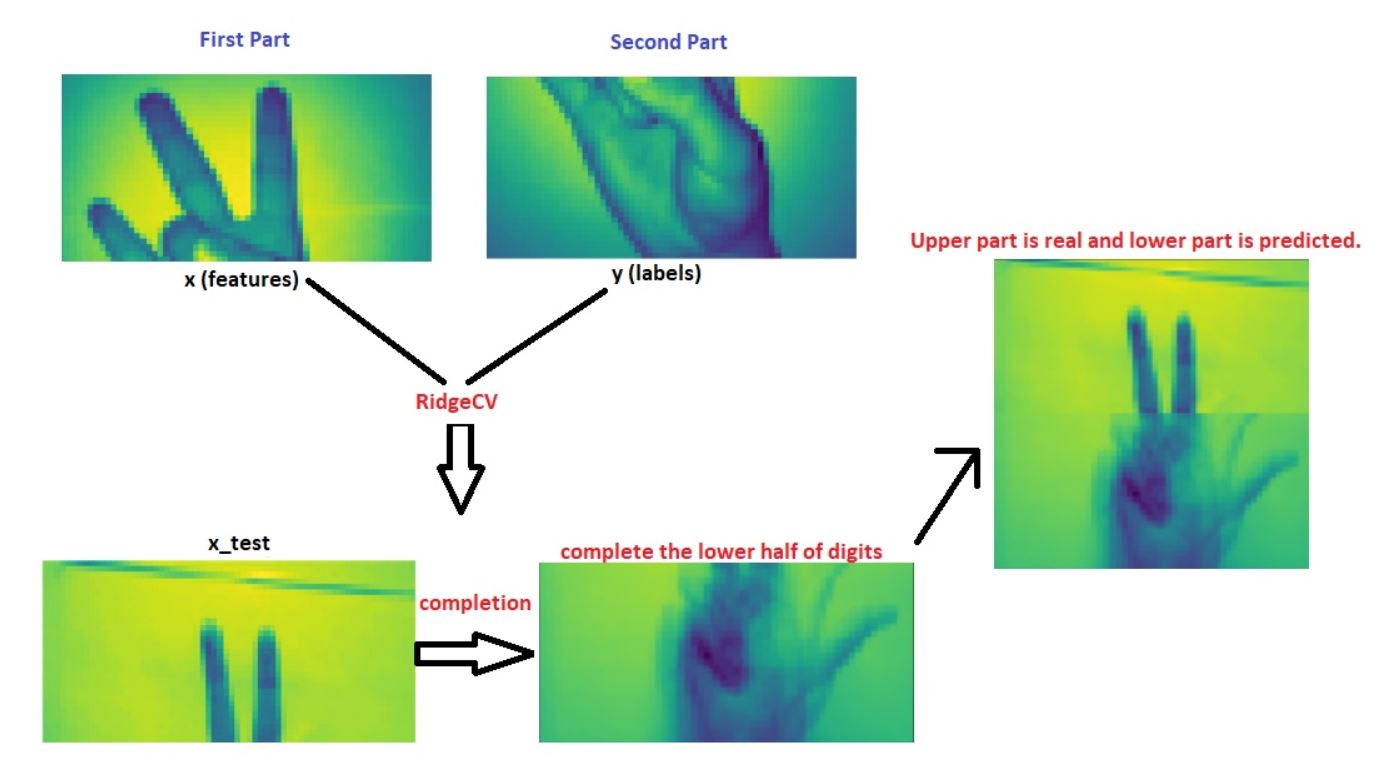

In [2]:
from IPython.display import Image
Image('Image.jpg')

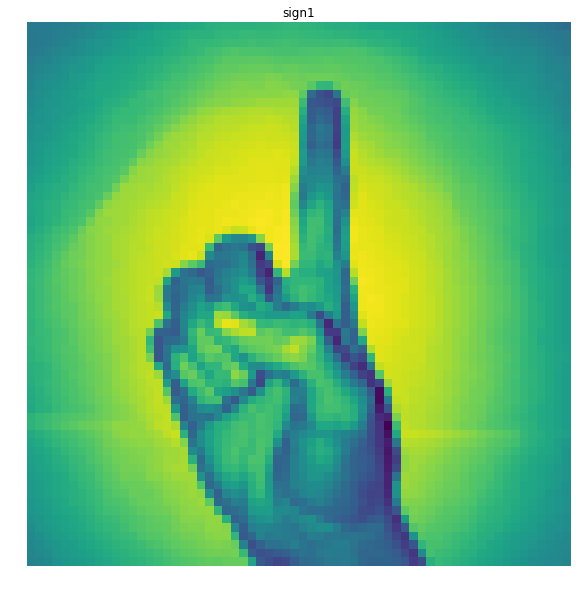

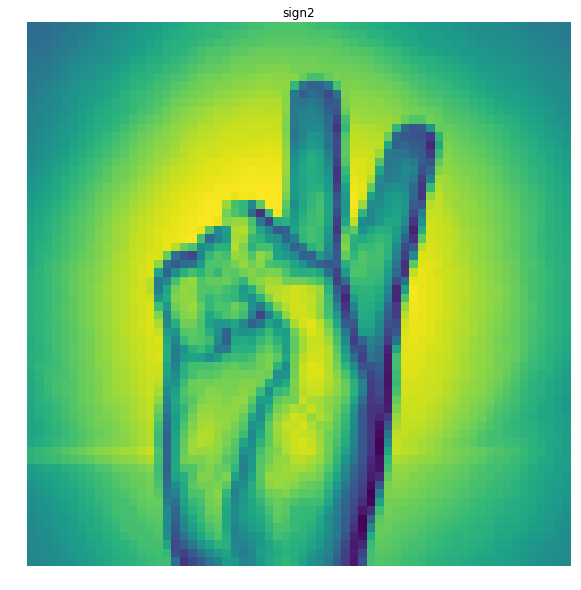

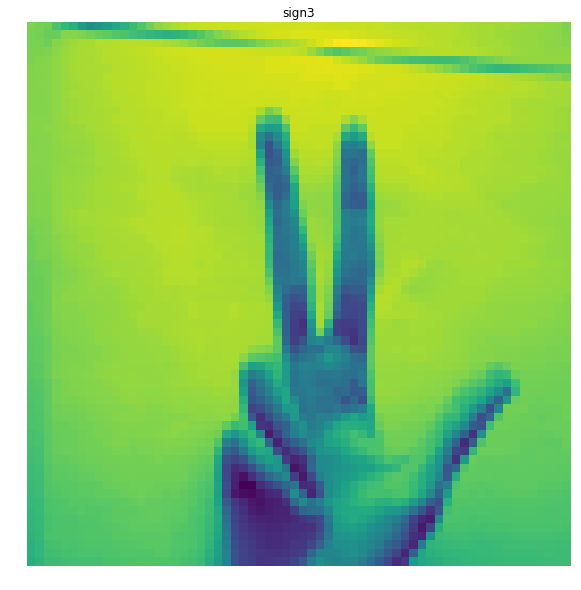

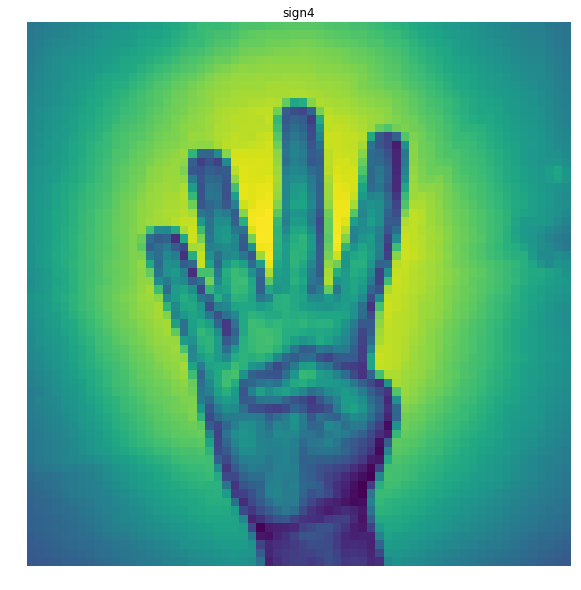

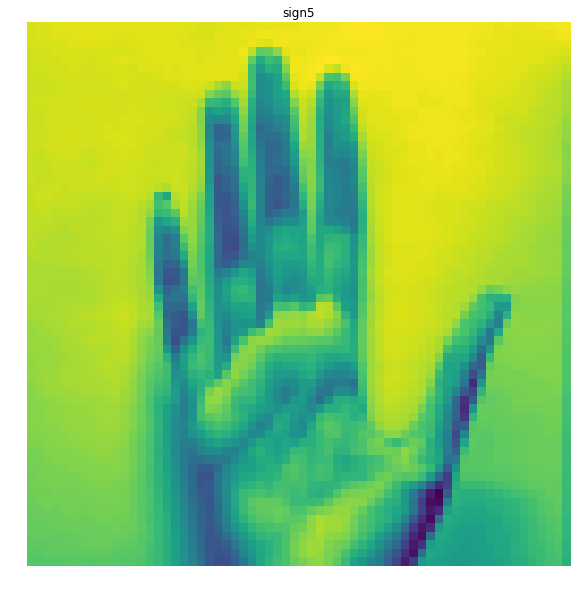

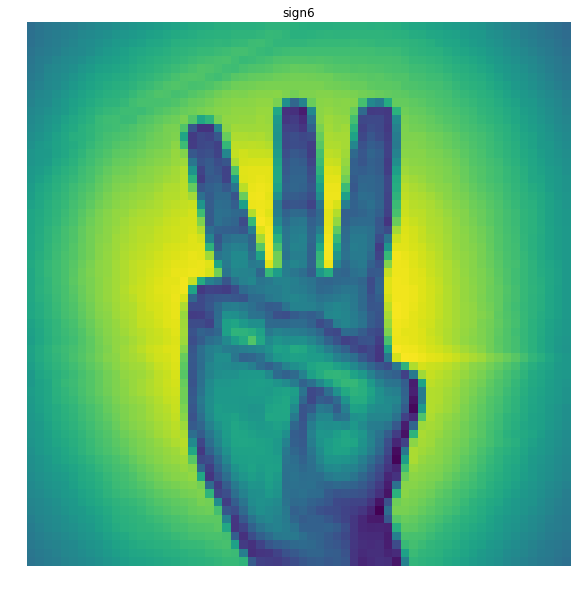

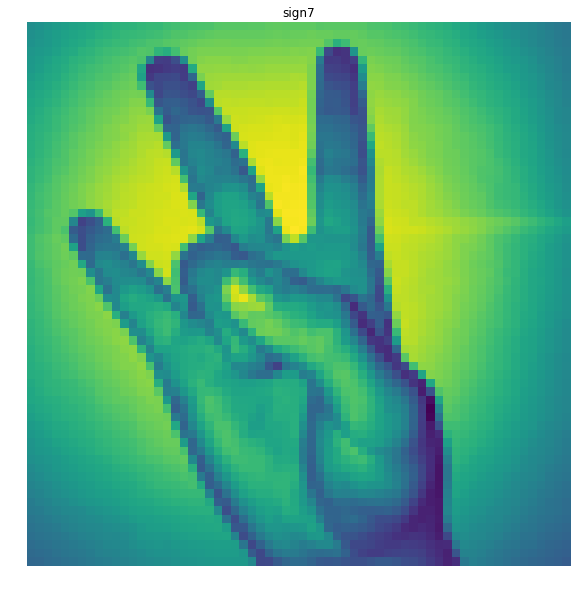

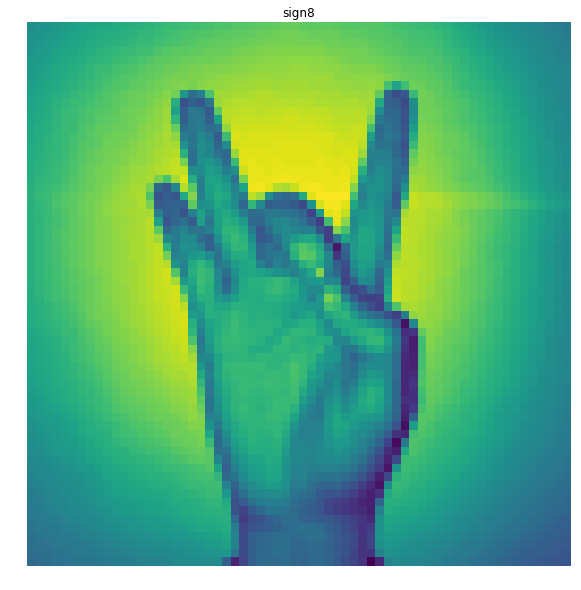

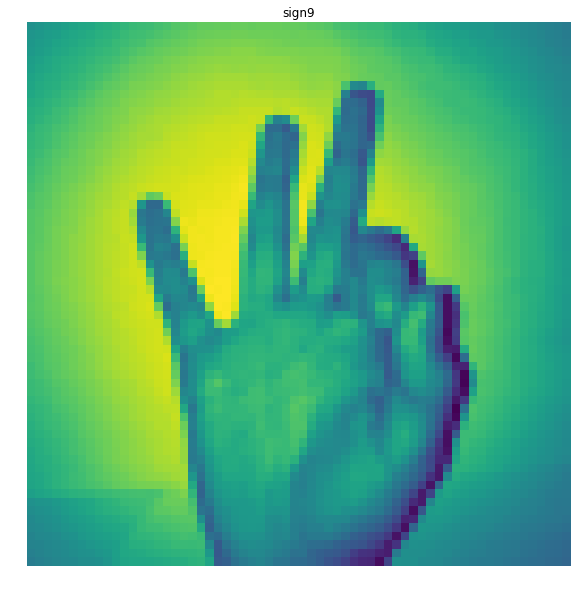

In [17]:
img_size = 64
image_list =  [260,900,1800,1600,1400,2061,700,500,1111,100]
for i in range (1,10):
    plt.figure(figsize=(10,10))
    plt.imshow(x_load[image_list[i]].reshape(img_size, img_size))
    plt.axis('off')
    title = 'sign' + str(i)
    plt.title(title)
plt.show()

# As a training set we will use all images.
# As a test set we will choose ten images and use them.
# reshape(-1) : It simply means that it is an unknown dimension and we want numpy to figure it out
# Difference between "//" and "/": for example 4097/2 = 2048.5 (division) and 4097//2 = 2048

In [18]:
X = x_load.reshape((len(x_load), -1))

In [23]:
train = X

In [58]:
X.shape

(2062L, 4096L)

In [24]:
test  = X[image_list]

In [27]:
n_pixels = X.shape[1]

In [28]:
X_train = train[:,:(n_pixels + 1) // 2]
X_test = test[:,:(n_pixels + 1) // 2]
y_train = train[:,n_pixels // 2:]
y_test = test[:,:n_pixels  // 2:]

In [35]:
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(2062L, 2048L)
(10L, 2048L)
(2062L, 2048L)
(10L, 2048L)


In [37]:
from sklearn import decomposition
from sklearn.linear_model import RidgeCV
import time

# Implemting RidgeCV to add Penatly term. When our model learn too much (over fit), we need to avoid it with regularization(penalty). 
# if we do not use regularization data will memorize the training set and cannot predict test set very well. 

In [40]:
rv = RidgeCV()
start = time.time()
rv.fit(X_train,y_train)
end = time.time()
print ('Training time is ' + str(end - start) + 'Seconds.')


Training time is 10.1470000744Seconds.


In [41]:
start = time.time()
y_pred = rv.predict(X_test)
end = time.time()
print ('Prediction time is ' + str(end - start) + 'Seconds.')


Prediction time is 0.00600004196167Seconds.


In [42]:
image_shape = (64,64)
n_faces = 10
n_cols = 1

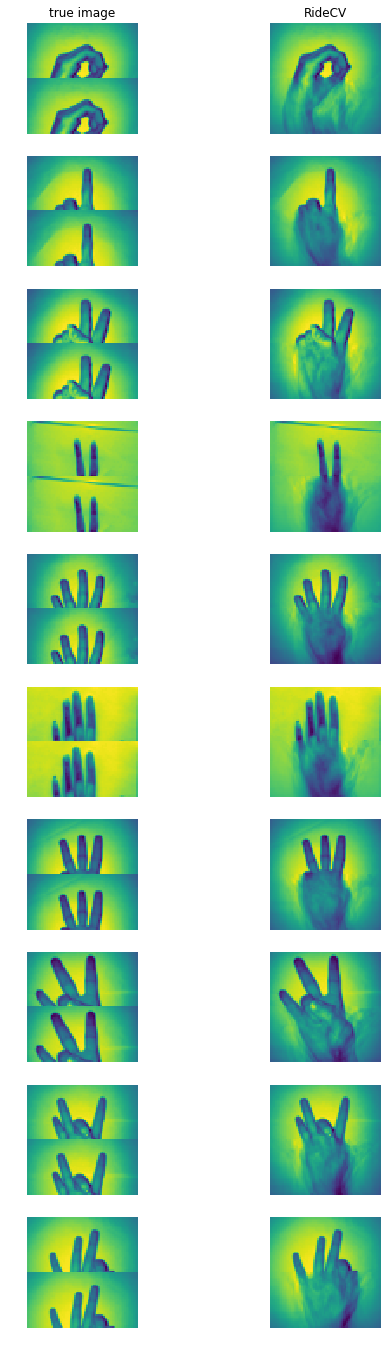

In [47]:
image_shape = (64,64)
plt.figure(figsize=(8,24))
for i in range(10):
    true_images = np.hstack((X_test[i], y_test[i]))
    if i:
        sub = plt.subplot(10,2,i*2+1)
    else:
        sub  = plt.subplot(10,2,i*2 + 1, title = 'true image')
    
    sub.imshow(true_images.reshape(image_shape), interpolation = 'nearest')
    sub.axis('off')
    completed_images = np.hstack((X_test[i], y_pred[i]))

   
    if i:
        sub = plt.subplot(10,2,i*2+2)
    else:
        sub  = plt.subplot(10,2,i*2 + 2, title = 'RideCV')
    
    sub.imshow(completed_images.reshape(image_shape), interpolation = 'nearest')
    sub.axis('off')
    
plt.show()

In [48]:
from sklearn.decomposition import PCA

In [49]:
pca = PCA()
pca.fit(X)
# X_pca = pca.transform(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

# fit() : learn how to shift samples along the axis. It creates orthogonal PCs.


# Looking at the features which has the max Variances absorbed

In [51]:

pca.explained_variance_

array([8.5815315e+00, 5.0632191e+00, 3.0776367e+00, ..., 1.1510803e-05,
       1.1160726e-05, 4.2245413e-10], dtype=float32)

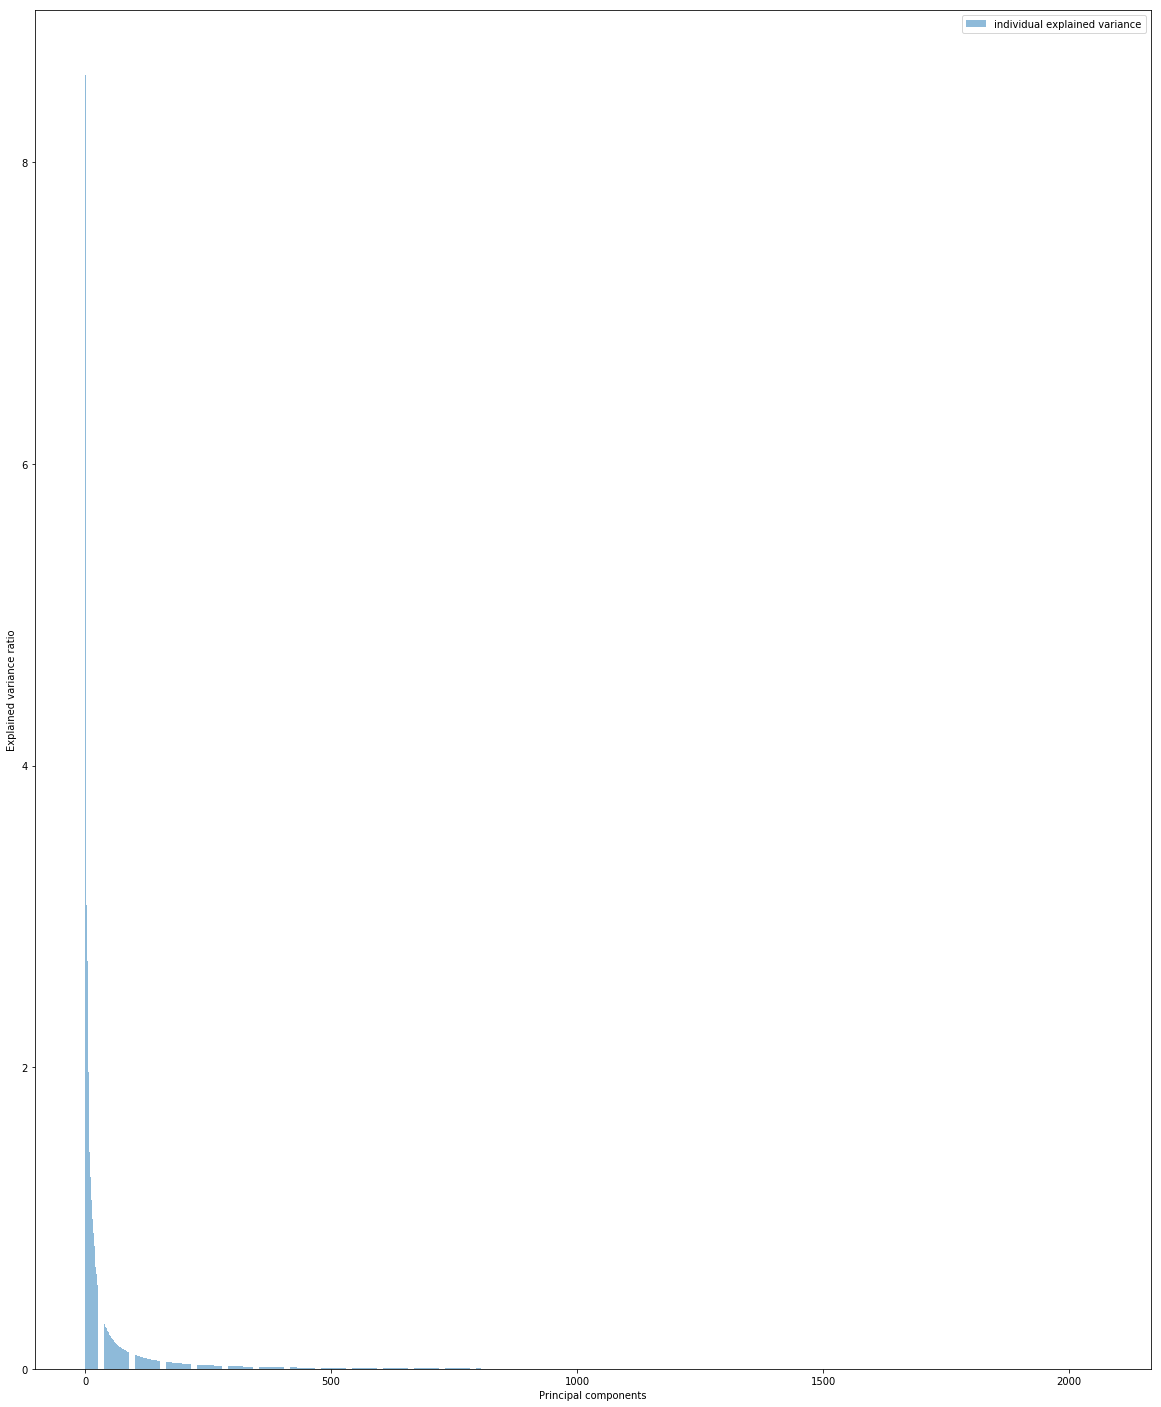

In [63]:
plt.figure(figsize=(20 , 25))
plt.bar(range(1,2063), pca.explained_variance_, alpha=0.5, align='center', label='individual explained variance')
# plt.step(range(1,10),pca.components_, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [76]:
pca = PCA(n_components=10)
(n_samples, n_features) = X.shape
pca.fit(X)
components = pca.components_
images = components[:10]

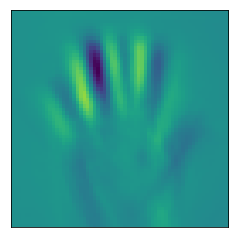

In [77]:
for i, comp in enumerate(images):
    vmax = max(comp.max(), -comp.min())
    plt.imshow(comp.reshape((64,64)), interpolation='nearest', vmin = -vmax, vmax = vmax)
    plt.xticks(())
    plt.yticks(())
plt.savefig('graph.png')
plt.show()

# In sign language digits, most important things are fingers
# After PCA, as we can see fingers are emphasized.